# Exercise: Using `matplotlib` to plot 

Having one variable on a chart is good, but is two better? In this exercise, you'll practice adding two variables to the same chart. You will also learn how to create a chart that has two different graphs on it on the same figure!

**Update the yfinance package**

[yfinance](https://pypi.org/project/yfinance/) module is frequently updated, and older versions are quickly deprecated. To ensure you're using the latest version, **run the code block below** and then **click Kernel → Restart** from the menu above. *(You don't need to re-run the code block after restarting, though doing so won't cause any issues.)*

In [43]:
!pip install --upgrade yfinance

**Download historical data for 2 years from one ticker**

Use the YFinance package to download 2 years of data for any ticker you'd like. 

In [45]:
import yfinance as yf

stock_ticker = 'AAPL'
start_date = '2023-01-01' # use format YYYY-MM-DD
end_date = '2025-01-01'

data = yf.download( stock_ticker, start= start_date, end = end_date )  # replace ... inside this function with the correct parameters in order to get your data

[*********************100%***********************]  1 of 1 completed


**Calculate the 20-day and 50-day moving average**

Use Pandas methods to calculate the 20-day and 50-day moving averages for your ticker.

In [47]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
2023-01-04,124.744133,127.014724,123.480503,125.267354,89113600
2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
2023-01-06,127.962418,128.623848,123.292909,124.398589,87754700
2023-01-09,128.485611,131.703931,128.228941,128.801526,70790800


In [48]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

**Plot the daily and moving average data on the same plot**

Use `matplotlib` and plot all 3 of these variables on the same line plot: closing price, 20-day moving average, and 50-day moving average. 

Make sure to use a different color for each variable. You can also practice adding a title and x-axis and y-axis labels to your chart. Optionally, you can add gridlines. 

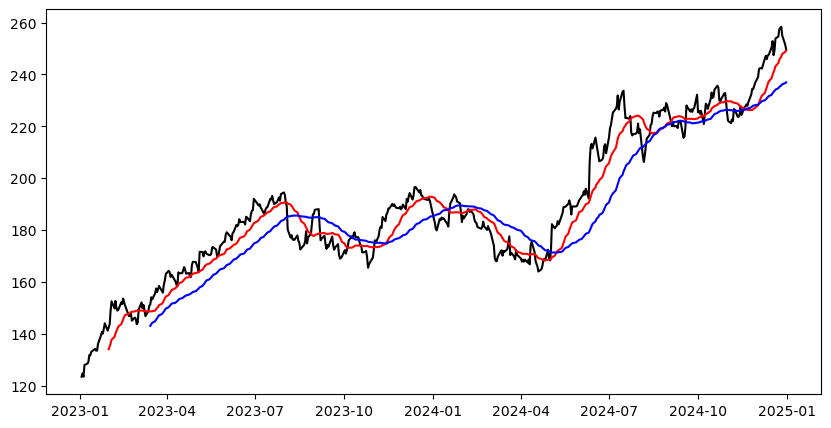

In [50]:
# make plot with 3 lines on it
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'], color='black')
plt.plot(data['MA_20'], color='red')
plt.plot(data['MA_50'], color='blue')
plt.show()



**Create plot with 2 subplots**

In this challenge, you'll be adding two different graphs to the same figure! This means that you'll have two different charts in one image. 

To do this in `matplotlib`, you'll be using the axes attribute of the `figure`. Recall that the `figure` is the canvas on which you draw your plots. You'll use a single figure, but add multiple axes to it, then you can put a different graph in each axes. 

Note that you're creating not just a `fig` like before, but now you're creating both a `fig` and `axes`:
```python
fig, ax = plt.subplots( num_subplots, figsize=(x,y), sharerx=True/False)
```

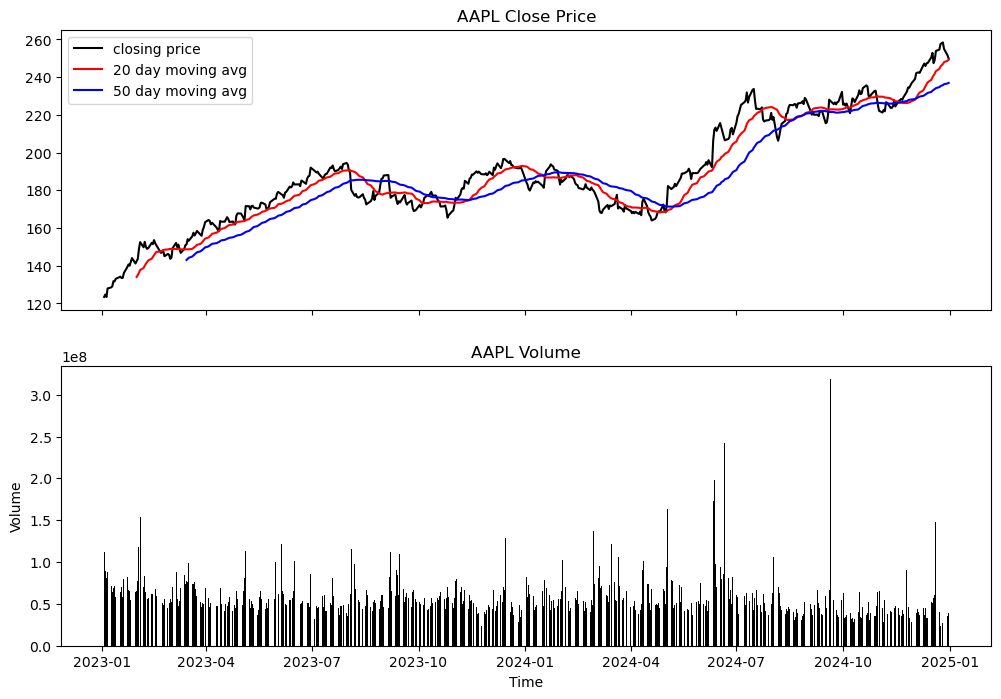

In [79]:
# first create a figure with two axes
fig, ax = plt.subplots(2, figsize=(12,8), sharex = True) # this is the foundation of creating multiple charts on one figure

# ax[0] creates the first chart. You'll want to add all 3 line plots to it: 
ax[0].plot(data['Close'], label='closing price', color='black') # add line chart for closing price
ax[0].plot(data['MA_20'], label='20 day moving avg', color='red') # add line chart for 20-day moving average
ax[0].plot(data['MA_50'], label='50 day moving avg', color='blue') # add line chart for 50-day moving average
ax[0].set_title('AAPL Close Price') # add a title for this graph
ax[0].legend()

# ax[1] creates the second, separate chart on the same figure
# replace ... and add a bar chart of daily trading volume.
# Remember that trading volumne is a column in the data you imported above
ax[1].bar(data.index, data['Volume']['AAPL'], label='Trading Volume', color='black')
ax[1].set_title("AAPL Volume") # set a title
ax[1].set_xlabel("Time") # set a title for the x-axis
ax[1].set_ylabel("Volume") # set a title for the y-axis 

plt.show()
